Import libraries

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Get all robot bounding boxes

In [6]:
def load_bounding_boxes(label_paths="data/raw/train/labels/") -> np.ndarray:
    """Load bounding box data from label files.

    Returns:
        np.ndarray: bounding boxes, shape (n, 4), dtype float32
        where 4 is (x, y, width, height) of bounding box
    """
    
    # initialize empty list
    robot_bounding_boxes = []
    
    # load bounding boxes from label files
    label_files = sorted(os.listdir(label_paths))
    # loop over all label files
    for label_path in label_files:
        # load label file
        label_strings = open(label_paths+label_path).read().splitlines()
        
        # loop over all labels in label file
        for label_string in label_strings:
            
            # check if label is robot
            if np.fromstring(label_string[0], sep=" ", dtype=np.float32) == 1:
                
                # append bounding box to list
                robot_bounding_boxes.append(np.fromstring(label_string[1:], sep=" ", dtype=np.float32)[2:])
                
    # convert list to numpy array
    robot_bounding_boxes = np.array(robot_bounding_boxes)
    return robot_bounding_boxes

robot_bounding_boxes = load_bounding_boxes()

Find bounding box clusters

3888
3888
3888
3888
3888
3888


/home/juell/Documents/GitHub/robot_detection/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


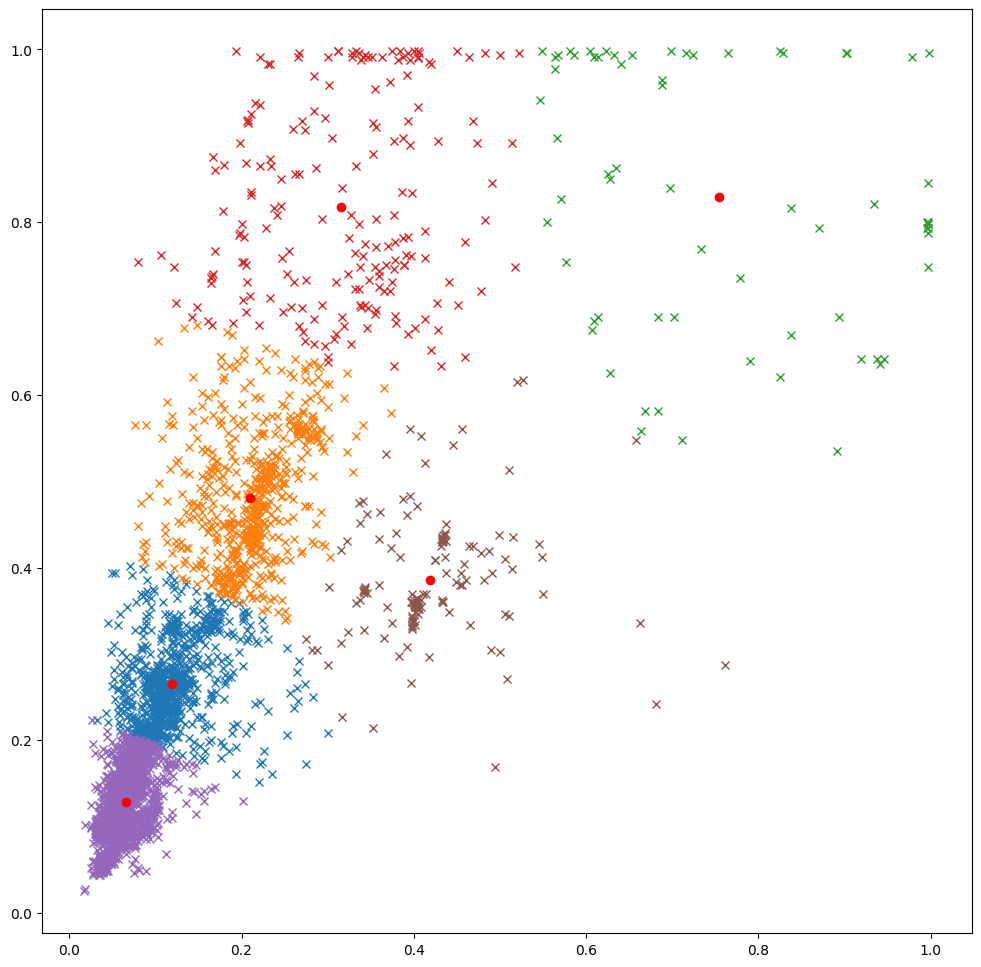

In [7]:
def cluster_centers(robot_bounding_boxes: np.ndarray, n_clusters: int):
    """Cluster the bounding boxes in n clusters

    Args:
        robot_bounding_boxes (np.ndarray): bounding boxes of all robot images
        n_clusters (int): the number of clusters we want

    Returns:
        tuple: cluster centers and the center with least distance to all bounding boxes
    """
    
    # fit kmeans on the bounding box data
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(robot_bounding_boxes)
    
    # get the corresponding cluster centers
    centers = kmeans.cluster_centers_
    
    # get the cluster with the smallest distance to all bounding boxes
    clustering = best_cluster_center(robot_bounding_boxes, centers)
    return centers, clustering


def best_cluster_center(bounding_boxes: np.ndarray, centers: np.ndarray) -> np.ndarray:
    # compute distances from all bounding boxes for each center and return the center with smallest distance
    distances = np.linalg.norm(bounding_boxes.reshape((-1,1,2))-centers.reshape((1,-1,2)), axis=2)
    return np.argmin(distances, axis=1)

def visualize_cluster_centers(centers: np.ndarray, clustering: np.ndarray) -> None:
    n_centers = centers.shape[0]
    plt.figure(figsize=(12,12))
    for i in range(n_centers):
        print(len(clustering))
        plt.plot(robot_bounding_boxes[clustering==i,0], robot_bounding_boxes[clustering==i,1], 'x', color='C'+str(i))
        plt.plot(centers[i,0], centers[i,1], 'o', color='red')
        
centers, clustering = cluster_centers(robot_bounding_boxes, 6)


visualize_cluster_centers(centers, clustering)

/home/juell/Documents/GitHub/robot_detection/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/juell/Documents/GitHub/robot_detection/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/juell/Documents/GitHub/robot_detection/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/juell/Documents/GitHub/robot_detection/.venv/lib/python3.1

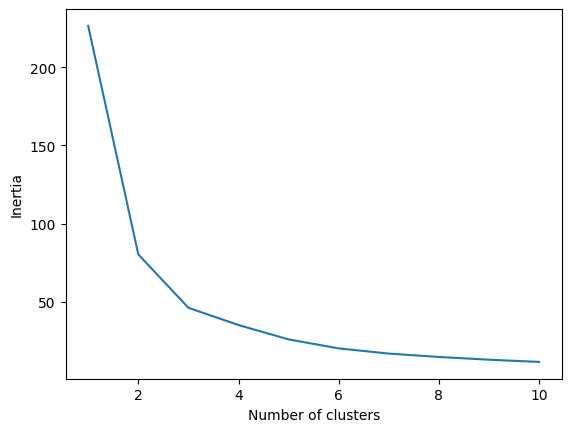

array([[0.06539708, 0.1283451 ],
       [0.119685  , 0.26551536],
       [0.20956908, 0.3853869 ],
       [0.3152952 , 0.4801411 ],
       [0.41862726, 0.8178706 ],
       [0.7547574 , 0.8290733 ]], dtype=float32)

In [8]:
def determine_optimal_cluster_number(bounding_boxes: np.ndarray, max_clusters: int=10) -> list:
    inertias = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(bounding_boxes)
        inertias.append(kmeans.inertia_)
    plt.plot(range(1, max_clusters+1), inertias)
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.show()
    return inertias
inertias = determine_optimal_cluster_number(robot_bounding_boxes, max_clusters=10)
np.sort(centers, axis=0)